In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc3 as pm
import arviz as az
import pandas as pd
az.style.use('arviz-white')

deliveries = pd.read_csv('deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [4]:
is_gayle = deliveries['batsman']=="CH Gayle"
is_gayle

0         False
1         False
2         False
3         False
4         False
          ...  
150455    False
150456    False
150457    False
150458    False
150459    False
Name: batsman, Length: 150460, dtype: bool

In [5]:
deliveries_gayle = deliveries[is_gayle]
deliveries_gayle

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150393,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,6,CH Gayle,V Kohli,MC Henriques,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150397,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,4,CH Gayle,V Kohli,Mustafizur Rahman,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150398,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,5,CH Gayle,V Kohli,Mustafizur Rahman,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150400,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,11,1,CH Gayle,V Kohli,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


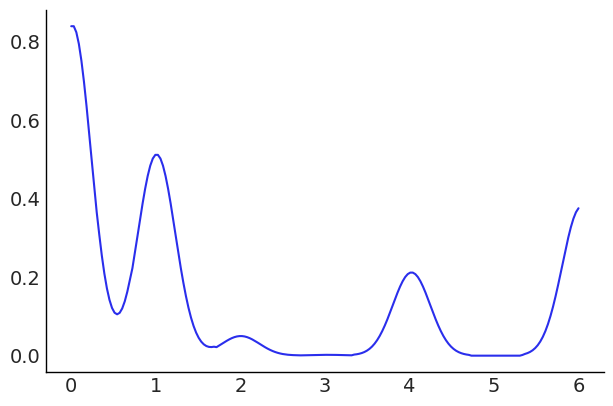

In [6]:
az.plot_kde(deliveries_gayle['batsman_runs'].values)



In [7]:
deliveries_gayle.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [8]:
gayle_runs = deliveries_gayle.groupby("match_id")["batsman_runs"].sum()
gayle_runs

match_id
1      32
5       6
12     22
20     77
27      7
       ..
624    49
626    73
632     1
633     9
636    76
Name: batsman_runs, Length: 100, dtype: int64

In [9]:
deliveries_gayle["dismissal_type"] = deliveries_gayle["dismissal_kind"].astype('string')
deliveries_gayle

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,dismissal_type
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,1,0,1,NaN,NaN,NaN,<NA>
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,NaN,NaN,NaN,<NA>
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,NaN,NaN,NaN,<NA>
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,1,0,1,NaN,NaN,NaN,<NA>
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,0,0,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150393,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,9,6,CH Gayle,V Kohli,MC Henriques,0,...,0,0,0,4,0,4,NaN,NaN,NaN,<NA>
150397,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,4,CH Gayle,V Kohli,Mustafizur Rahman,0,...,0,0,0,0,0,0,NaN,NaN,NaN,<NA>
150398,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,5,CH Gayle,V Kohli,Mustafizur Rahman,0,...,0,0,0,1,0,1,NaN,NaN,NaN,<NA>
150400,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,11,1,CH Gayle,V Kohli,BCJ Cutting,0,...,0,0,0,1,0,1,NaN,NaN,NaN,<NA>


In [10]:
gayle_dismissals = deliveries_gayle.groupby("match_id")["dismissal_type"]
gayle_dismissals

In [11]:
gayle_dismissals = deliveries_gayle.groupby("match_id")["dismissal_type"].apply(','.join).reset_index()
gayle_dismissals

TypeError: sequence item 0: expected str instance, NAType found

In [12]:
dtypes = deliveries_gayle.dtypes
dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dismissal_type      string
dtype: object

In [13]:
x = deliveries_gayle['dismissal_kind'].notnull()
y = deliveries_gayle[x]
y

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,dismissal_type
165,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,3,CH Gayle,TM Head,DJ Hooda,0,...,0,0,0,0,0,0,CH Gayle,caught,DA Warner,caught
980,5,1,Royal Challengers Bangalore,Delhi Daredevils,4,2,CH Gayle,SR Watson,CH Morris,0,...,0,0,0,0,0,0,CH Gayle,caught,SV Samson,caught
2646,12,1,Royal Challengers Bangalore,Mumbai Indians,10,2,CH Gayle,V Kohli,HH Pandya,0,...,0,0,0,0,0,0,CH Gayle,caught,PA Patel,caught
4638,20,1,Royal Challengers Bangalore,Gujarat Lions,13,4,CH Gayle,V Kohli,Basil Thampi,0,...,0,0,0,0,0,0,CH Gayle,lbw,NaN,lbw
6416,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,7,3,CH Gayle,STR Binny,CR Woakes,0,...,0,0,0,0,0,0,CH Gayle,caught,NM Coulter-Nile,caught
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147605,624,2,Royal Challengers Bangalore,Kolkata Knight Riders,8,3,CH Gayle,V Kohli,SP Narine,0,...,0,0,0,0,0,0,CH Gayle,lbw,NaN,lbw
147938,626,1,Royal Challengers Bangalore,Kings XI Punjab,11,6,CH Gayle,V Kohli,AR Patel,0,...,0,0,0,0,0,0,CH Gayle,caught,DA Miller,caught
149379,632,2,Royal Challengers Bangalore,Delhi Daredevils,2,1,CH Gayle,V Kohli,CH Morris,0,...,0,0,0,0,0,0,CH Gayle,bowled,NaN,bowled
149630,633,2,Royal Challengers Bangalore,Gujarat Lions,4,2,CH Gayle,AB de Villiers,DS Kulkarni,0,...,0,0,0,0,0,0,CH Gayle,bowled,NaN,bowled


In [14]:
features = ['match_id', 'dismissal_kind']
gayle_dismissals2 = gayle_dismissals.loc[:, features].values
gayle_dismissals2

AttributeError: 'SeriesGroupBy' object has no attribute 'loc'

In [15]:
final = pd.concat([deliveries_gayle, y])
final

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,dismissal_type
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,1,0,1,NaN,NaN,NaN,<NA>
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,NaN,NaN,NaN,<NA>
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,NaN,NaN,NaN,<NA>
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,1,0,1,NaN,NaN,NaN,<NA>
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,0,0,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147605,624,2,Royal Challengers Bangalore,Kolkata Knight Riders,8,3,CH Gayle,V Kohli,SP Narine,0,...,0,0,0,0,0,0,CH Gayle,lbw,NaN,lbw
147938,626,1,Royal Challengers Bangalore,Kings XI Punjab,11,6,CH Gayle,V Kohli,AR Patel,0,...,0,0,0,0,0,0,CH Gayle,caught,DA Miller,caught
149379,632,2,Royal Challengers Bangalore,Delhi Daredevils,2,1,CH Gayle,V Kohli,CH Morris,0,...,0,0,0,0,0,0,CH Gayle,bowled,NaN,bowled
149630,633,2,Royal Challengers Bangalore,Gujarat Lions,4,2,CH Gayle,AB de Villiers,DS Kulkarni,0,...,0,0,0,0,0,0,CH Gayle,bowled,NaN,bowled


In [16]:
final = deliveries_gayle.drop(columns=['inning', 'batting_team', 
                                       'bowling_team', 'batsman', 
                                       'non_striker', 
                                       'is_super_over', 'bye_runs',
                                       'wide_runs', 'legbye_runs',
                                       'noball_runs', 'penalty_runs',
                                       'extra_runs', 'total_runs', 
                                       'player_dismissed', 
                                       'dismissal_kind', 
                                       'fielder'])
final

,match_id,over,ball,bowler,batsman_runs,dismissal_type
125,1,1,1,A Nehra,1,<NA>
131,1,2,1,B Kumar,0,<NA>
132,1,2,2,B Kumar,0,<NA>
133,1,2,3,B Kumar,1,<NA>
137,1,3,1,A Nehra,0,<NA>
...,...,...,...,...,...,...
150393,636,9,6,MC Henriques,4,<NA>
150397,636,10,4,Mustafizur Rahman,0,<NA>
150398,636,10,5,Mustafizur Rahman,1,<NA>
150400,636,11,1,BCJ Cutting,1,<NA>


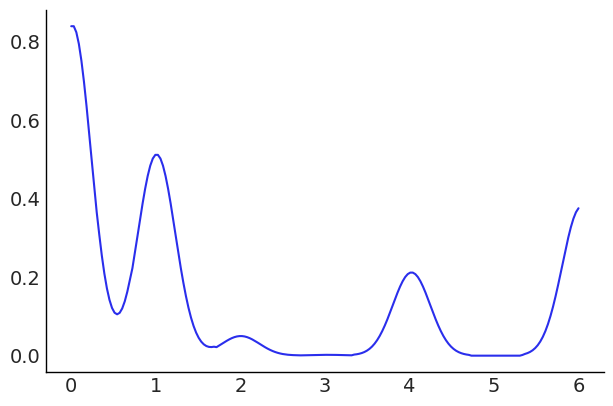

In [17]:
az.plot_kde(final['batsman_runs'].values)

In [18]:
z = final.isnull()
z

,match_id,over,ball,bowler,batsman_runs,dismissal_type
125,False,False,False,False,False,True
131,False,False,False,False,False,True
132,False,False,False,False,False,True
133,False,False,False,False,False,True
137,False,False,False,False,False,True
...,...,...,...,...,...,...
150393,False,False,False,False,False,True
150397,False,False,False,False,False,True
150398,False,False,False,False,False,True
150400,False,False,False,False,False,True


In [19]:
final["dismissal_type"].fillna("not out", inplace = True)
final

,match_id,over,ball,bowler,batsman_runs,dismissal_type
125,1,1,1,A Nehra,1,not out
131,1,2,1,B Kumar,0,not out
132,1,2,2,B Kumar,0,not out
133,1,2,3,B Kumar,1,not out
137,1,3,1,A Nehra,0,not out
...,...,...,...,...,...,...
150393,636,9,6,MC Henriques,4,not out
150397,636,10,4,Mustafizur Rahman,0,not out
150398,636,10,5,Mustafizur Rahman,1,not out
150400,636,11,1,BCJ Cutting,1,not out


In [20]:
gayle_runs = final.groupby("match_id")["batsman_runs"].sum()
gayle_runs

match_id
1      32
5       6
12     22
20     77
27      7
       ..
624    49
626    73
632     1
633     9
636    76
Name: batsman_runs, Length: 100, dtype: int64

In [21]:
gayle_runs = gayle_runs.reset_index()
gayle_runs

,match_id,batsman_runs
0,1,32
1,5,6
2,12,22
3,20,77
4,27,7
...,...,...
95,624,49
96,626,73
97,632,1
98,633,9


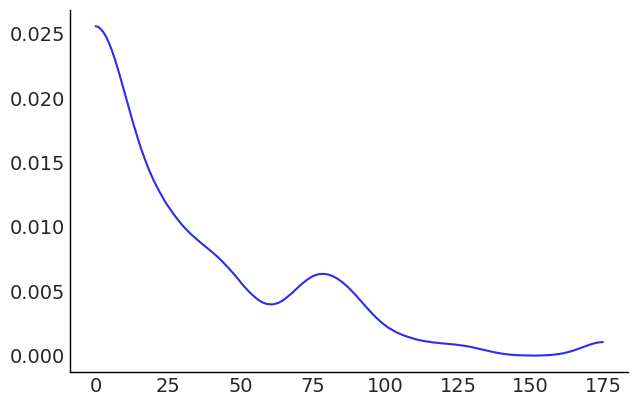

In [22]:
az.plot_kde(gayle_runs['batsman_runs'].values)

In [23]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=200)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, 
                  observed=gayle_runs['batsman_runs'].values)
    trace_g = pm.sample(500, tune=500, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, μ]
Sampling chain 1, 0 divergences: 100%|██████████| 1000/1000 [00:01<00:00, 685.35it/s]
The acceptance probability does not match the target. It is 0.8878488563031958, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002783BACD860>,
      dtype=object)

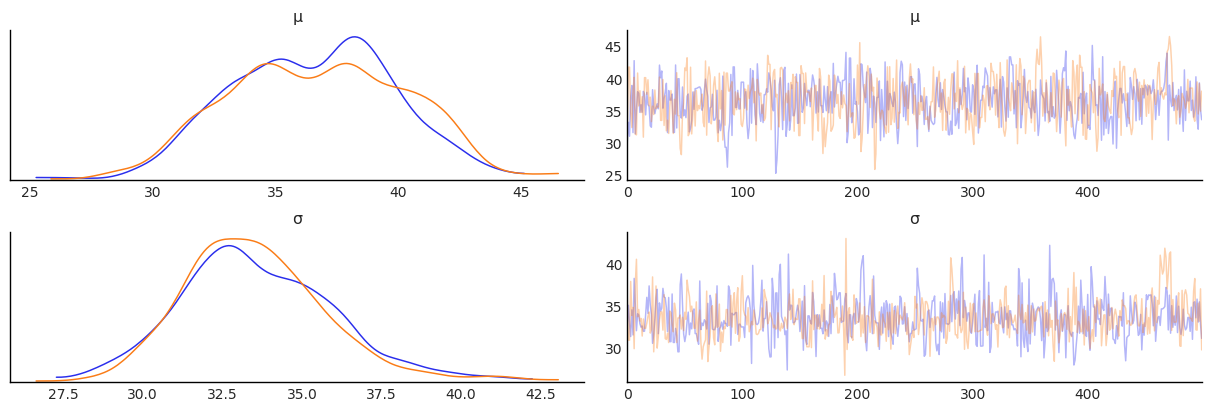

In [24]:
az.plot_trace(trace_g)

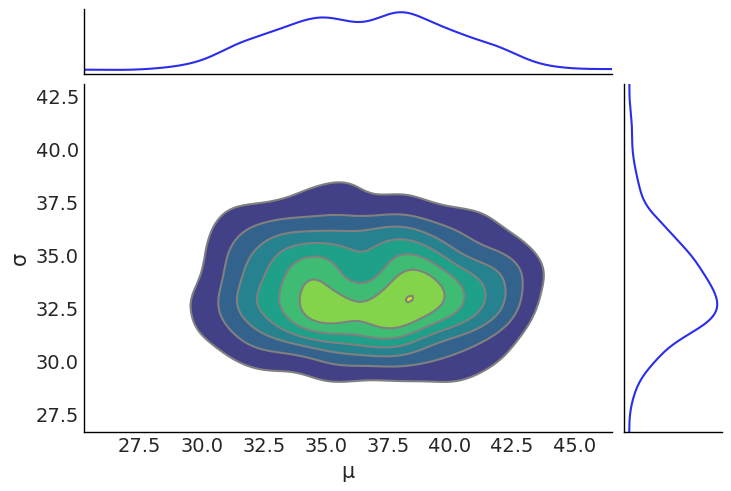

In [25]:
az.plot_joint(trace_g, kind='kde', fill_last=False);

In [26]:
with pm.Model() as model_h:
    μ2 = pm.Uniform('μ', lower=0, upper=200)
    σ2 = pm.HalfNormal('σ', sd=10)
    y2 = pm.Normal('y', mu=μ2, sd=σ2, 
                   observed=gayle_runs['batsman_runs'].values)
    trace_h = pm.sample(1000, tune=1000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:07<00:00, 519.91draws/s]


C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002783C373048>,
      dtype=object)

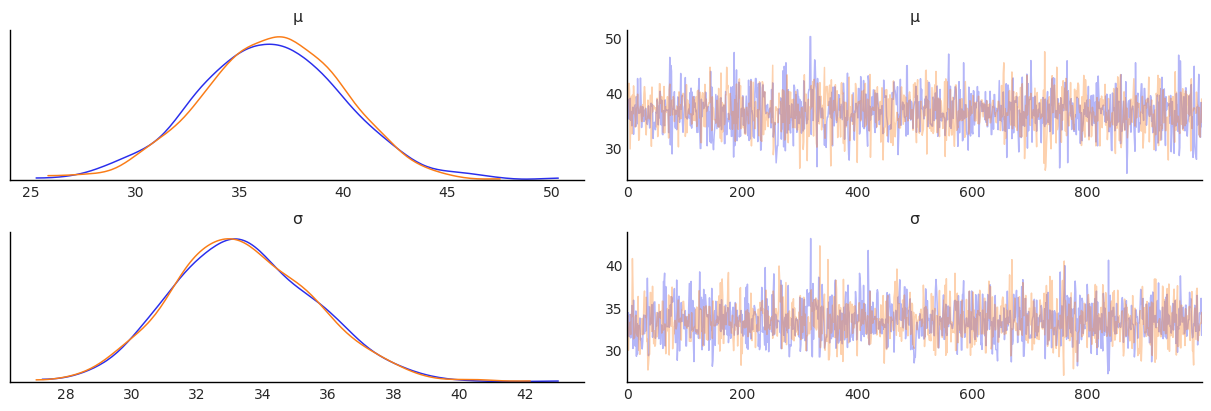

In [27]:
az.plot_trace(trace_h)

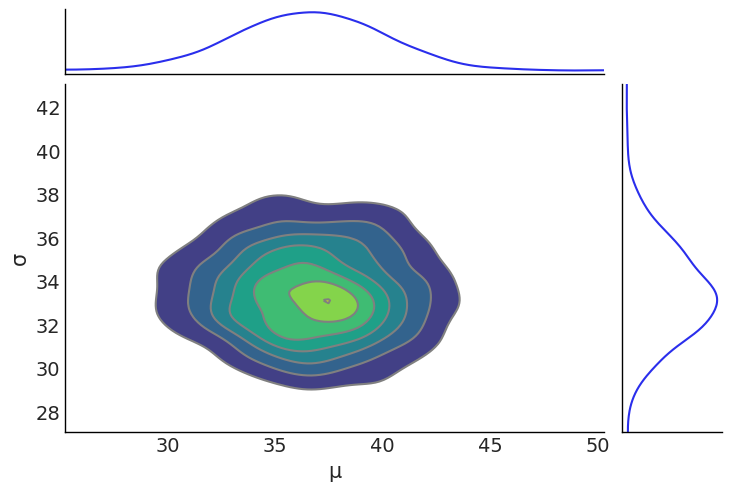

In [28]:
az.plot_joint(trace_h, kind='kde', fill_last=False);

In [29]:
with pm.Model() as model_i:
    μ3 = pm.Uniform('μ', lower=0, upper=200)
    σ3 = pm.HalfNormal('σ', sd=10)
    y3 = pm.Normal('y', mu=μ3, sd=σ3, 
                   observed=gayle_runs['batsman_runs'].values)
    trace_i = pm.sample(1500, tune=1000, cores=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [σ, μ]
Sampling 3 chains, 0 divergences: 100%|██████████| 7500/7500 [00:10<00:00, 702.64draws/s] 


C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002783D234DD8>,
      dtype=object)

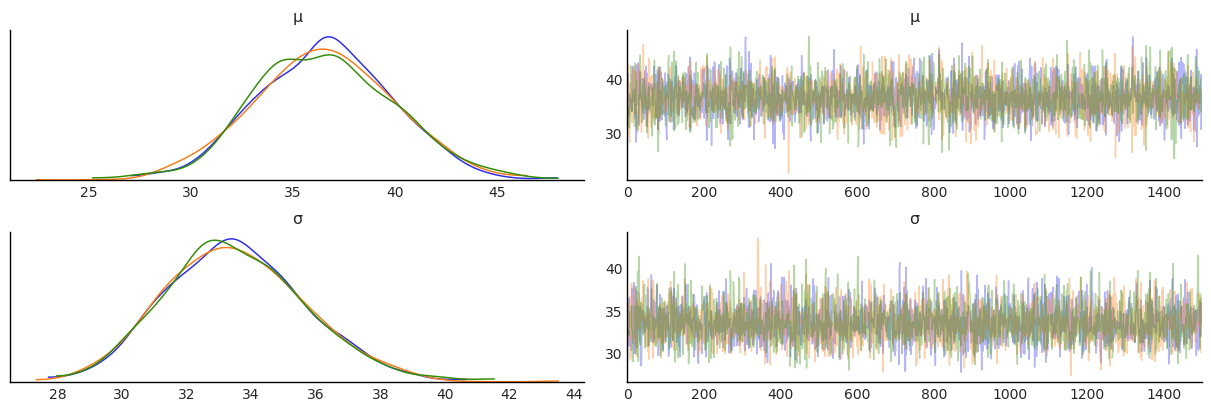

In [30]:
az.plot_trace(trace_i)

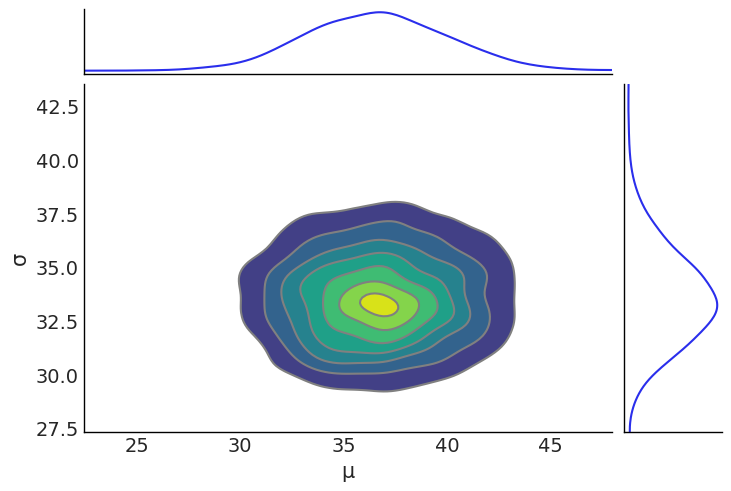

In [31]:
az.plot_joint(trace_i, kind='kde', fill_last=False);

In [32]:
az.summary(trace_g)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,36.564,3.442,30.825,42.769,0.126,0.089,743.0,743.0,737.0,494.0,1.0
σ,33.551,2.364,29.464,38.271,0.102,0.075,533.0,503.0,590.0,414.0,1.0


In [33]:
az.summary(trace_h)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,36.533,3.448,29.900,42.635,0.079,0.056,1893.0,1893.0,1933.0,1369.0,1.0
σ,33.445,2.155,29.213,37.169,0.050,0.035,1857.0,1857.0,1831.0,1260.0,1.0


In [34]:
az.summary(trace_i)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,36.548,3.368,30.167,42.669,0.054,0.038,3959.0,3959.0,3958.0,2509.0,1.0
σ,33.538,2.166,29.322,37.392,0.035,0.025,3880.0,3830.0,4081.0,3258.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002783D5985C0>,
      dtype=object)

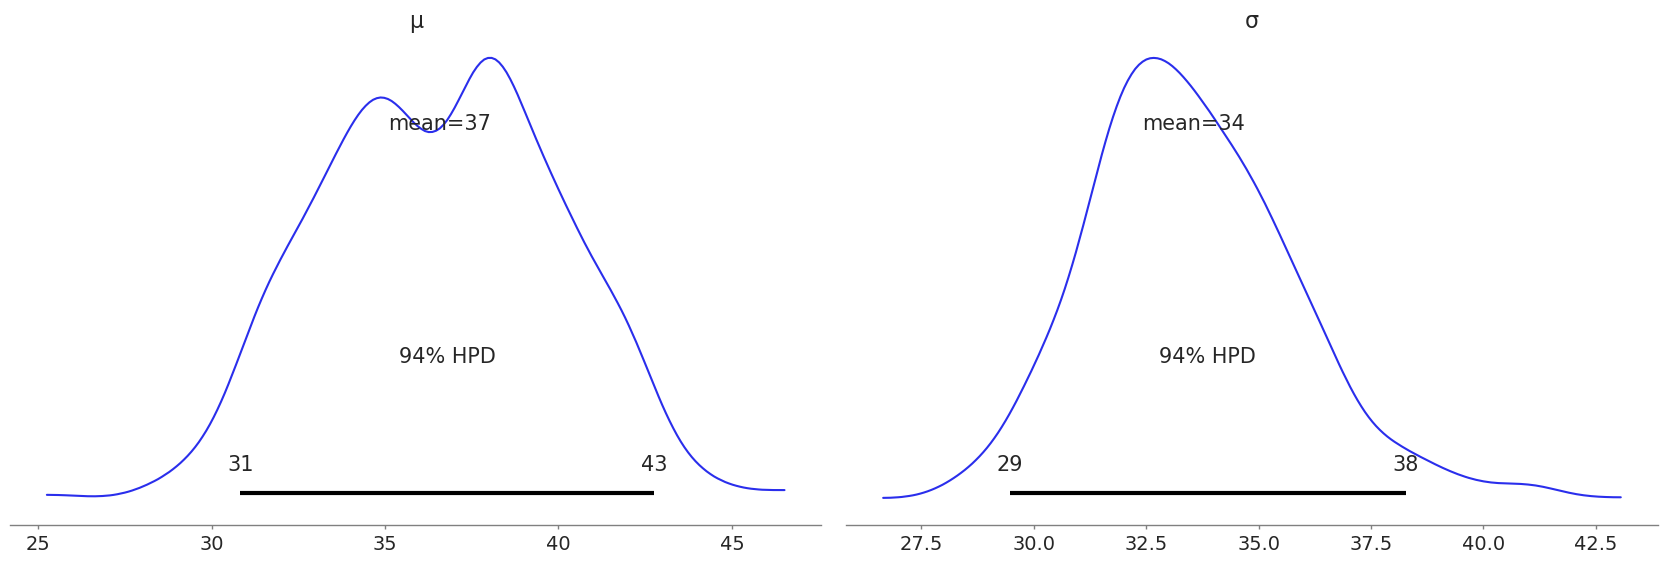

In [35]:
az.plot_posterior(trace_g)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002783DBA19B0>,
      dtype=object)

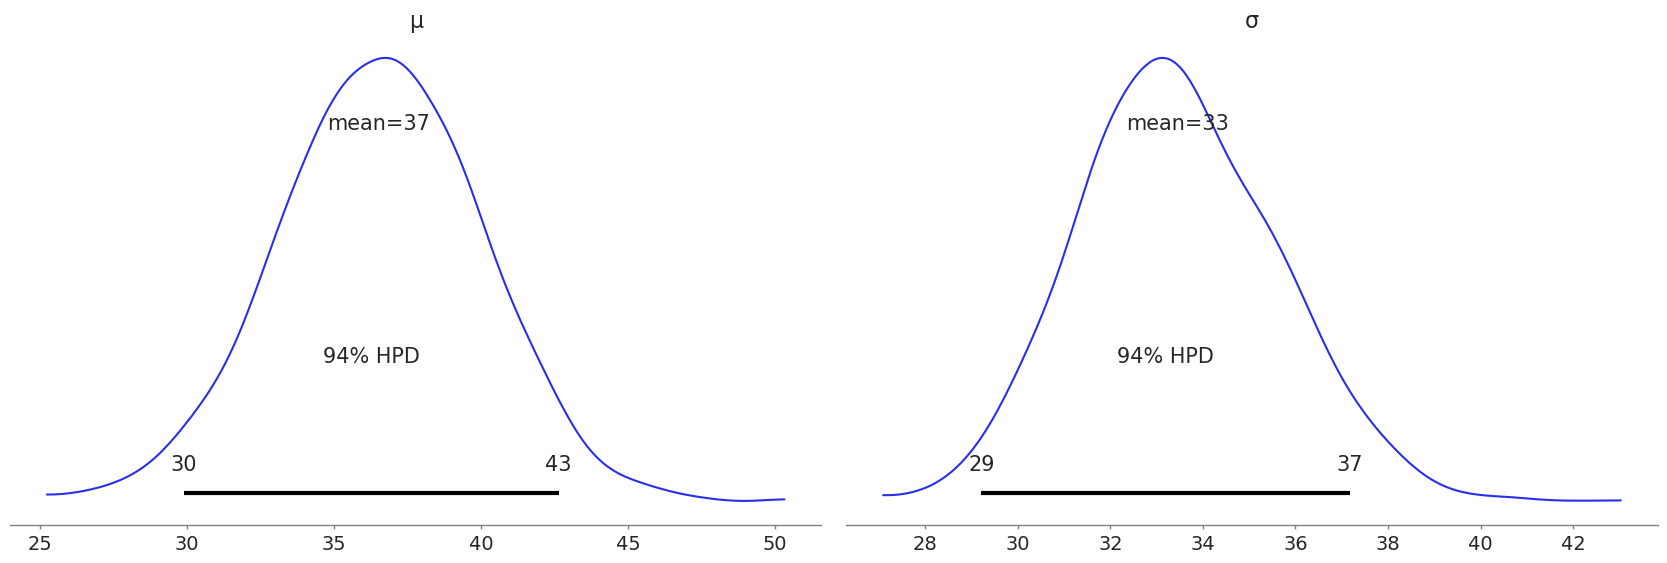

In [36]:
az.plot_posterior(trace_h)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002783DBB84A8>,
      dtype=object)

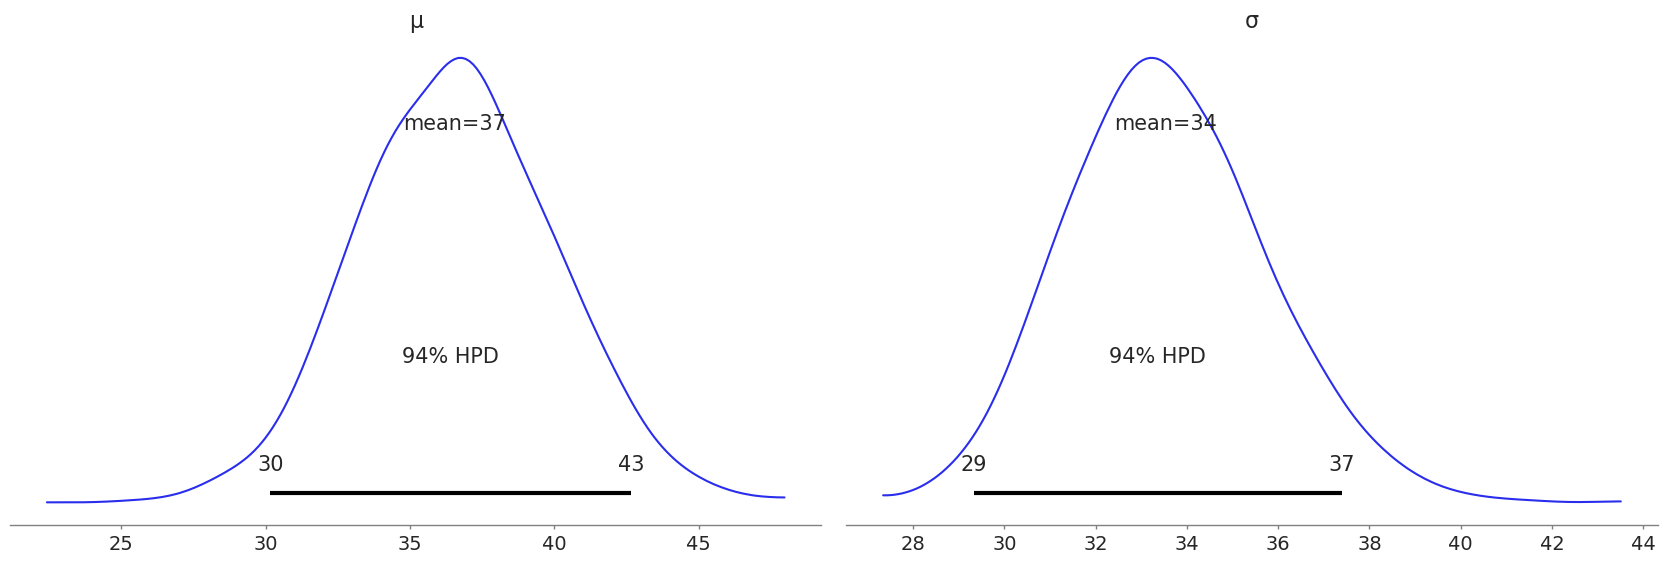

In [37]:
az.plot_posterior(trace_i)

In [38]:
pm.rhat(trace_g)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    μ        float64 1.005
    σ        float64 1.003

In [39]:
pm.rhat(trace_h)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    μ        float64 0.9998
    σ        float64 1.003

In [40]:
pm.rhat(trace_i)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    μ        float64 1.001
    σ        float64 0.9997

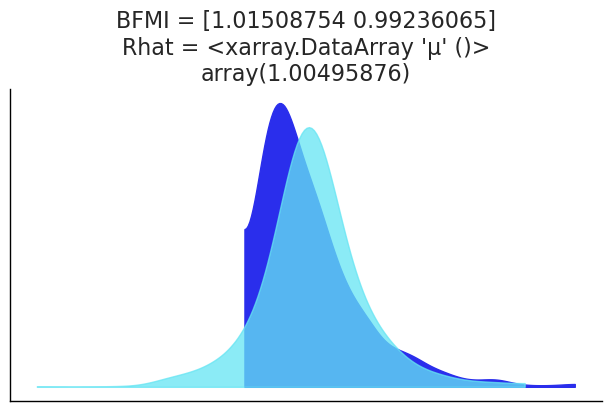

In [41]:
bfmi = pm.bfmi(trace_g)
max_gr = max(np.max(gr_stats) for gr_stats in pm.rhat(trace_g).values())
(pm.energyplot(trace_g, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nRhat = {}".format(bfmi, max_gr)));

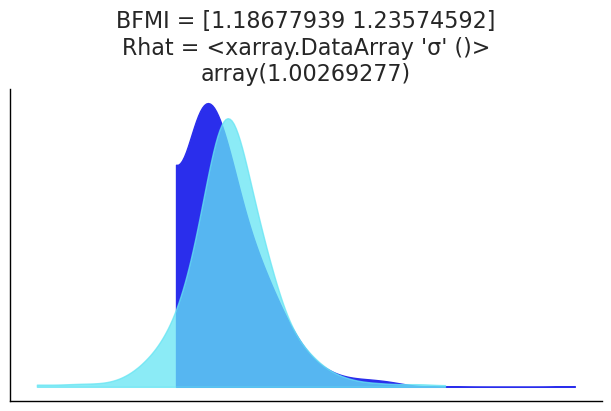

In [42]:
bfmi2 = pm.bfmi(trace_h)
max_gr2 = max(np.max(gr_stats) for gr_stats in pm.rhat(trace_h).values())
(pm.energyplot(trace_h, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nRhat = {}".format(bfmi2, max_gr2)));

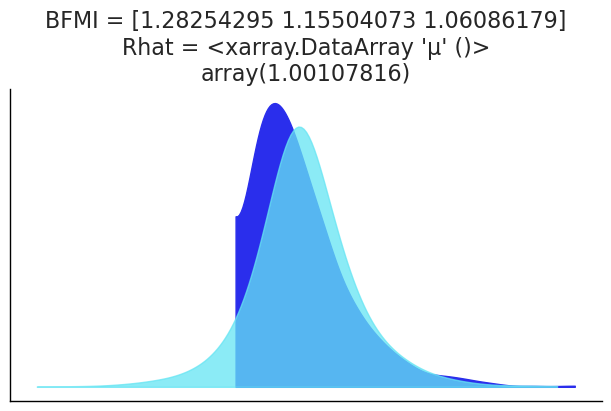

In [43]:
bfmi3 = pm.bfmi(trace_i)
max_gr3 = max(np.max(gr_stats) for gr_stats in pm.rhat(trace_i).values())
(pm.energyplot(trace_i, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nRhat = {}".format(bfmi3, max_gr3)));

In [44]:
with pm.Model() as model_j:
    μ4 = pm.Uniform('μ', lower=0, upper=200)
    σ4 = pm.HalfNormal('σ', sd=10)
    y4 = pm.Normal('y', mu=μ4, sd=σ4, 
                   observed=gayle_runs['batsman_runs'].values)
    trace_j = pm.sample(2000, tune=1500, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains, 0 divergences: 100%|██████████| 7000/7000 [00:10<00:00, 667.62draws/s] 


C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\karan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002783D7074A8>,
      dtype=object)

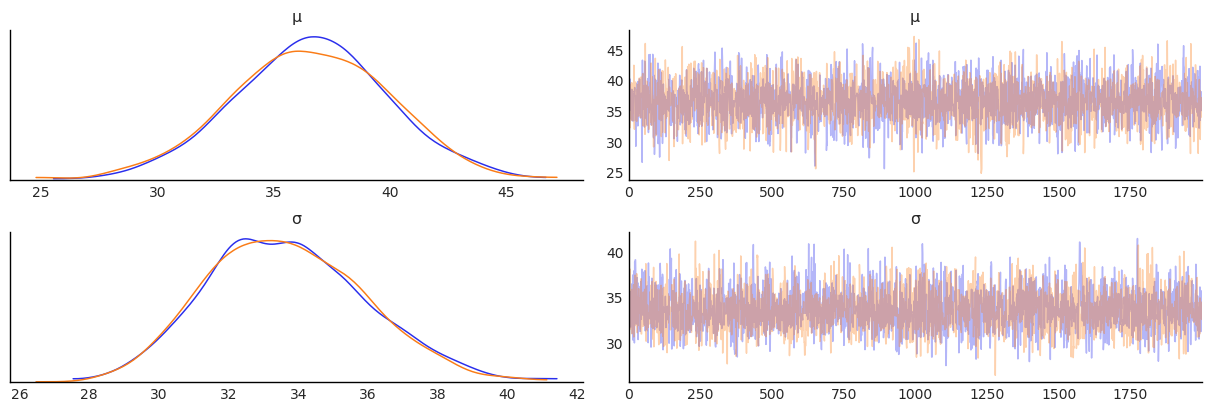

In [45]:
az.plot_trace(trace_j)

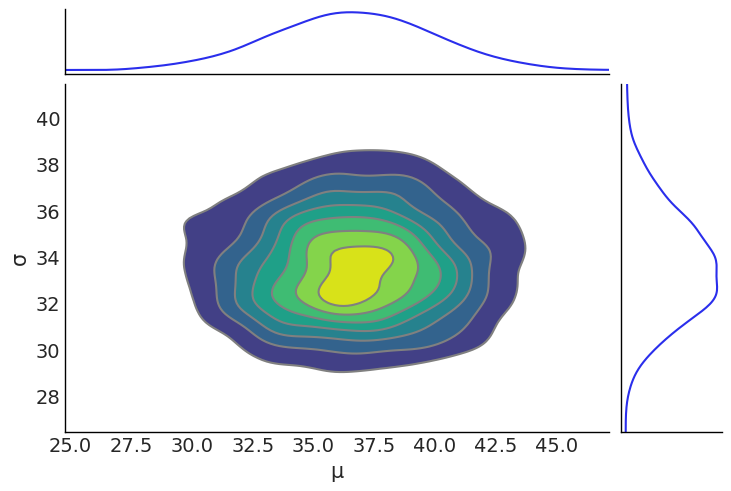

In [46]:
az.plot_joint(trace_j, kind='kde', fill_last=False);

In [47]:
pm.rhat(trace_j)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    μ        float64 1.001
    σ        float64 1.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002783D45FC50>,
      dtype=object)

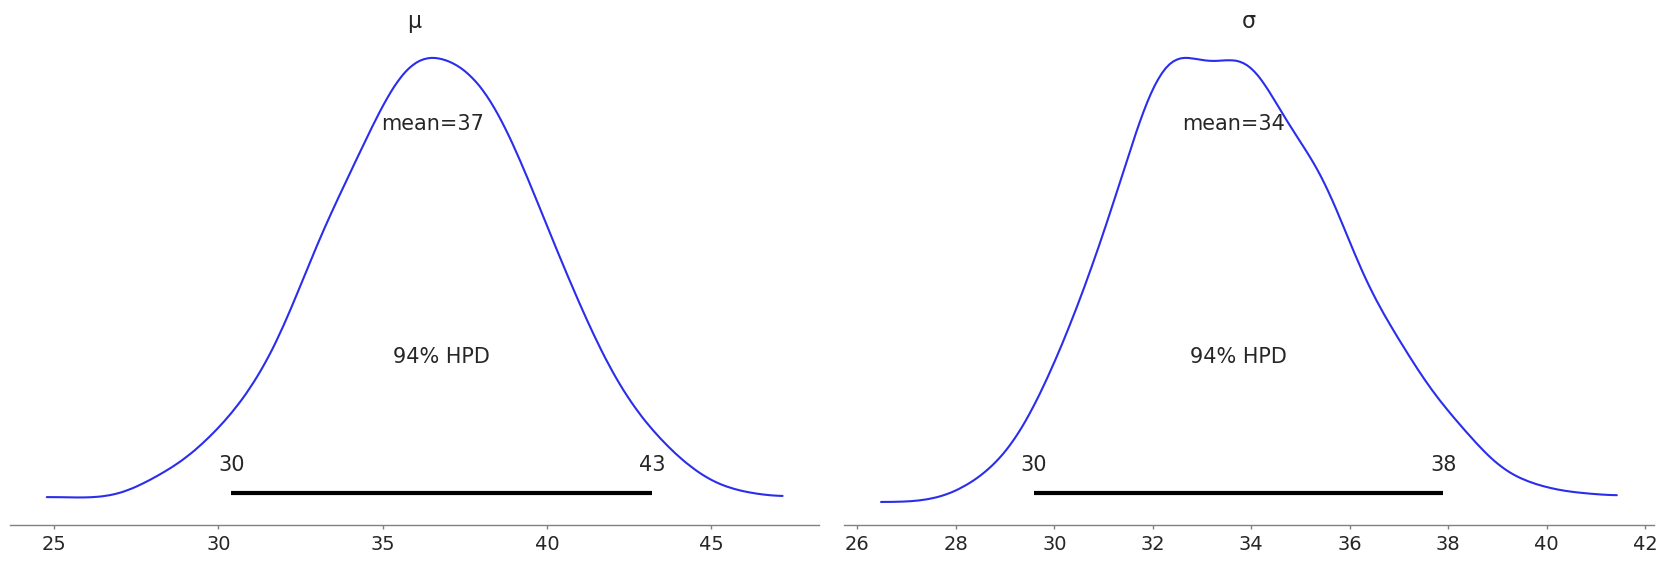

In [48]:
az.plot_posterior(trace_j)

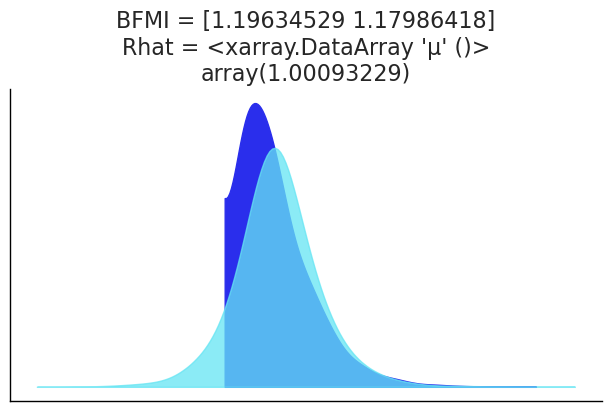

In [49]:
bfmi4 = pm.bfmi(trace_j)
max_gr4 = max(np.max(gr_stats) for gr_stats in pm.rhat(trace_j).values())
(pm.energyplot(trace_j, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nRhat = {}".format(bfmi4, max_gr4)));

In [50]:
ppc = pm.sample_posterior_predictive(trace_j, samples=2000, 
                                     model=model_j)
np.asarray(ppc['y']).shape

C:\Users\karan\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:03<00:00, 574.68it/s]


(2000, 100)

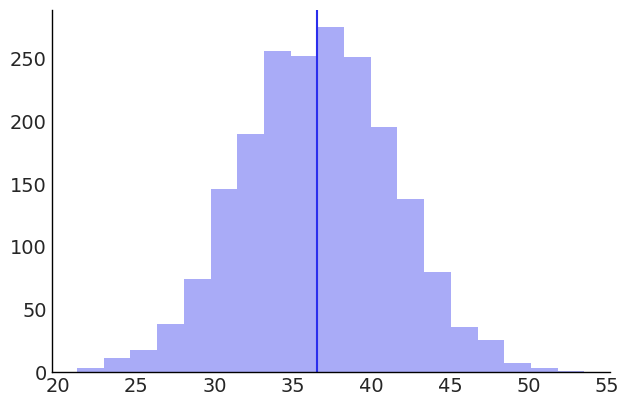

In [51]:
plot = plt.hist([y4.mean() for y4 in ppc['y']], bins=19, alpha=0.4)
plot = plt.axvline(gayle_runs.batsman_runs.mean())
